# Desafio Uno - Data Science


## Digital House, Turno Noche Mar-Jue-Sab Sede Belgrano

### Grupo n° 7

Integrantes: 
    Huarcaya Quinteros, Katja Joselyn; 
    Gorosabel, Lucas; 
    Arzani Domenget, Nicolas

### Objetivo: Identificar las principales características del rendimiento escolar promedio sobre una muestra de puntajes obtenidos apartir de los examenes de admision universitaria en los Estados Unidos, SAT Reasoning Test.

#### El material bajo estudio contiene las medias de los resultados obtenidos en dichos examenes, en cada estado, divididos en tres categorias, matematicas, expresion escrita y totales del año 2015.
Asi mismo se incluiran tablas informativas sobre el PBI por estado y Caracteristicas demograficas para analisar posibles correlaciones.

##### Para relizar el analisis de los datos provistos se utilizaran tecnicas de estadistica descriptiva y visualizacion de datos codificados en Python 3. Utilizaremos las lbrerias Numpy, MatPlotLib, Pandas y Seaborn



###### DataSet Provisto.

In [14]:
# SATscore2015.csv

###### A continuacion se describen todos los pasos que hemos seguido durante nuestro analisis:
    a-Importacion de Librerias.
    b-Importacion de Datos.
    c-Examinacion de datos crudos obtenidos.
    d-Determinacion de tipo de datos obtenidos.
    e-Determinacion del tipo y de la estructura de los datos.
    f-Limpieza de datos.
    g-Reestructuracion de datos acorde a las necesidades de nuestro analisis.
    e-Identificacion de datos comunes, patrones y medidas de dispercion.
    h-Exclusion de datos no relevantes.
    i-Elaboracion de graficas descriptivas.
    j-Conclusiones.
    

##### Importacion de Librerias

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

##### Importacion de datos

In [16]:
scores = pd.read_csv('SATscore2015.csv', sep=',')
pbi = pd.read_csv('pbi.csv', sep=';')


In [93]:
pob_eeuu = pd.read_csv('poblacionEEUU.csv', sep=',')

##### Examinacion de datos Crudos

Visualizacion de los DataSet como DataFrames de Pandas

In [17]:
scores

,State,Mathematics,Writing,Total SAT score
0,Alabama,538,533,1616
1,Alaska,503,482,1494
2,Arizona,527,502,1552
3,Arkansas,569,551,1688
4,California,506,491,1492
5,Colorado,587,567,1736
6,Connecticut,506,504,1514
7,Delaware,461,445,1368
8,District of Columbia,440,432,1313
9,Florida,480,468,1434


In [18]:
#pbi

In [19]:
#pob_eeuu

Observamos los encabezados

In [20]:
scores.columns

Index(['State', 'Mathematics', 'Writing', 'Total SAT score'], dtype='object')

##### Determinacion del tipo y de la estructura de los datos

Tipos de datos

In [21]:
#scores.info()

*Notamos que la Variable MATHEMATICS es de tipo object, asi que intuimos que debe haber algun valor missing


In [22]:
#pbi.info()

In [23]:
#pob_eeuu.info()

Para conocer el numero de columnas y filas de cada uno de los DataFrame

In [24]:

#score.shape
#pbi.shape
#pob_eeuu.shape

Apartir de la sospecha de valores "Mssing" en la tabla de SAT Scores evaluamos los datos nulos

In [25]:
## Primero verifico si hay valores NAN
df1_bool = pd.isnull(scores)
df2_bool = pd.isnull(pbi)
df3_bool = pd.isnull(pob_eeuu)
#print (df1_bool)
#print (df2_bool)
#print (df3_bool)
### Este comando devuelve una tabla booleana con True si el valor es un NaN o False si no lo es

In [26]:
# Este metodo para contar los datos NAN no esta funcionando o 
# al menos no devuelve valores coincidentes con la evaluacion anterior


#Otra forma de saber si tengo datos nulos, NAN
#print (scores[scores.isnull()!=True].count(),"\n")
#print (pbi[pbi.isnull()!=True].count(), "\n")
#print (pob_eeuu[pob_eeuu.isnull()!=True].count(), "\n")

Tenemos datos de tipo NAN en la tabla "PBI" y "POB_EEUU", pero no en la Tabla de "SCORES" Aunque en la "SCORES" aun tenemos un dato que no es numerico.

##### Limpieza de datos.

Basados en los resultados que obtuminos en el analisis de datos probamos los siguientes metodos para llevar a todos los valores al mismo tipo de dato.

Tenemos un valor perdido(Missing), en la columna de resultados de Matematicas en la tabla scores, avaluamos esa columna

In [27]:
#para eliminar ese valor missing por 0
datos_miss = pd.to_numeric(scores['Mathematics'], errors='coerce')
#Convertimos a un DataFramde de Pandas la tabla anterior
df = pd.DataFrame(datos_miss)
#df

Intentamos otro metodo para hacer que todos los datos sean de igual tipo, numericos. Definimos una funcion que recorra todos los datos de la columna bajo analisis e intente convertir sus datos a "Numero", sino lo logra por tratarse de un valor no numerico lo iguala a cero y conserva en una lista el dato "Missing" para su posterior observacion.

In [28]:
#Definimos la funcion

state = scores["State"].values
mathScore = scores["Mathematics"].values
writingScore = scores["Writing"].values
totalScore = scores["Total SAT score"].values
valoresInvalidos = []
filaInvalida = []

def limpieza(columnas):
  for i in range(len(columnas)):
    try:
        columnas[i] = float(columnas[i])
    except:
      valoresInvalidos.append((state[i], columnas[i], i)) #Guardo lo valores para no perder datos
      filaInvalida.append(scores.loc[i]) #Datos de la fila que tiene valores invalidos para nuestro analisis
      columnas[i] = "NaN" #Redefino el valor para no generar problemas cuando quiera hacer calculos
    continue

La siguiente funcion nos muestra los datos obtenidos despues de la limpieza.

In [29]:
def datosNoValidos():
    for x in range(len(valoresInvalidos)):
        lista = list(valoresInvalidos[x])
        if len(valoresInvalidos) >= 0 :
            print ("Periodo del loop : ", x)
            print ("::Valores Invalidos encontrados :: \n", "Estado : ", lista[0], "\n", "Valor invalido : ", lista[1], "\n", "Posicion(fila) : ", lista[2], "\n")
        else:
            print ("No se han encontrado valores invalidos en las tablas seleccionadas")

In [30]:
limpieza(mathScore)

In [31]:
datosNoValidos()

Periodo del loop :  0
::Valores Invalidos encontrados :: 
 Estado :  Virginia 
 Valor invalido :  . 
 Posicion(fila) :  47 



Por precaucion removemos el espacio en el nombre de la columna "Total SAT score"

In [32]:
scores.columns

Index(['State', 'Mathematics', 'Writing', 'Total SAT score'], dtype='object')

In [33]:
scores = scores.rename(columns={'Total SAT score': 'TotalSATscore'})

In [34]:
#Verificamos el cambio en el Nombre de la Columna
scores.columns

Index(['State', 'Mathematics', 'Writing', 'TotalSATscore'], dtype='object')

##### Reestructuracion de datos acorde a las necesidades de nuestro analisis.

In [35]:
#Guardamos nuestro nuevo Data Frame con el nobre "Scores" y con la extension "csv"
scores.to_csv('scores.csv')
#datos.to_csv('scores.csv')


Levantamos nuestro nuevo DataSet y definimos la columna State como indice.

In [36]:
scores = pd.read_csv('scores.csv', sep=',' , index_col='State')

Dado a que cuando guardamos el DataFrame se genera una columna nueva con los indices implicitos, decidimos eliminar dicha columna.

In [37]:
try:
    scores = scores.drop('Unnamed: 0', 1)
except:
    print ("¡¡¡ LA ECEPCION HA SIDO EJECUTADA !!!")   

In [38]:
#Guardamos nuestro ultimo cambio
scores.to_csv('scores.csv')

#### Llegado este punto podemos evitar correr los scrptis anteriores, hemos guardado los cambios anteriormente echos, la limpieza y nuestra estructura.
Solo levantando el scores.csv alcanza para seguir avanzando en el trabajo de analisis.

Importaremos nuevamente las librerias y seguiremos trabajando con nuestro DataFrame.

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [40]:
#Importamos nuestros Datos
scores = pd.read_csv('scores.csv', sep=',' , index_col='State')
pbi = pd.read_csv('pbi.csv', sep=';')
pob_eeuu = pd.read_csv('poblacionEEUU.csv', sep='\t')

### Identificacion de datos comunes, patrones y medidas de dispercion.

Determinamos la Media, Mediana y Desvio Estandar para las columnas de nuestra tabla de Scores

In [41]:
#Algunas medidas de tendencia central

print('Media : ', "\n", datos.mean(), "\n")
print('Mediana : ',"\n", datos.median(), "\n")
print('Desvio estandar :',"\n", datos.std(), "\n")

NameError: name 'datos' is not defined

### Rango de valores de los datos

###### Maximos y minmos

In [ ]:
print ("Maximo Puntaje para Matematicas : ", scores.Mathematics.max() )
print ("Minimo Puntaje para Matematicas : ", scores.Mathematics.min())
print ("Maximo Puntaje para Expresion escrita : ",scores.Writing.max())
print ("Minimo Puntaje para Expresion escrita : ",scores.Writing.min())
print ("Maximo Puntaje para Total : ",scores.TotalSATscore.max())
print ("Minimo Puntaje para Total : ",scores.TotalSATscore.min())

###### Rango de valores para puntajes de Matematicas

In [ ]:
rangoMath = (scores.Mathematics.max() - scores.Mathematics.min())
rangoMath

###### Rango de valores para puntajes de Exprecion escrita

In [ ]:
rangoWrit = (scores.Writing.max() - scores.Writing.min())
rangoWrit

###### Rango de valores para los puntajes Totales del examen SAT

In [ ]:
rangoTotal = (scores.TotalSATscore.max() - scores.TotalSATscore.min())
rangoTotal

Segmentacion por cuartiles

In [ ]:
#Usaremos el rango para partir los curtiles desde la mitad de rango hacia los lados
porcion1 = (rangoTotal/4)
porcion2 = (rangoWrit/4)
porcion3 = (rangoMath/4)

#EL primer cuartil es desde el minimo hasta una cuarta parte del rango y asi sucesivamente.

cuartilUnoMath = scores.Mathematics.min() + porcion3
cuartilUnoMath = scores.Mathematics.min() + (2 * porcion3)
cuartilUnoMath = scores.Mathematics.min() + (3 * porcion3)
cuartilUnoMath = scores.Mathematics.min() + (4 * porcion3)

Normalizacion de la Tabla de Scores

In [ ]:
datosNormal = datos

datosNormal.Mathematics= ((datosNormal.Mathematics.values - datosNormal.Mathematics.mean())/datosNormal.Mathematics.std())
datosNormal.Writing= ((datosNormal['Writing'].values - datosNormal.Writing.mean())/datosNormal.Writing.std())
datosNormal.TotalSATscore = ((datosNormal['TotalSATscore'].values - datosNormal.TotalSATscore.mean())/datosNormal.TotalSATscore.std())


In [64]:
#datosNormal.iloc[:,:1].sort_values(['Mathematics'], ascending = True)

#seg = pd.DataFrame(scores.loc[(scores['TotalSATscore'].values < (scores.TotalSATscore.mean() + scores.TotalSATscore.std())) & (scores['TotalSATscore'].values > (scores.TotalSATscore.mean() -scores.TotalSATscore.std()))])
aUnDesvioMas = (scores.TotalSATscore.mean() + scores.TotalSATscore.std())
aUnDesvioMen = (scores.TotalSATscore.mean() - scores.TotalSATscore.std())

a = scores.loc[(scores['TotalSATscore'] >= aUnDesvioMen) & (scores['TotalSATscore'] <= aUnDesvioMas), ['TotalSATscore']]

print(a.sort_values("TotalSATscore"))
am=a.mean()


                TotalSATscore
State                        
Florida                  1434
South Carolina           1442
Georgia                  1450
Nevada                   1458
Maryland                 1462
New York                 1469
Hawaii                   1472
Rhode Island             1472
Indiana                  1473
North Carolina           1478
Pennsylvania             1485
California               1492
Alaska                   1494
Washington               1496
West Virginia            1501
Connecticut              1514
New Jersey               1520
Virginia                 1533
Oregon                   1546
Arizona                  1552
Massachusetts            1552
Vermont                  1554
New Hampshire            1566
Alabama                  1616
New Mexico               1623
Montana                  1655
Ohio                     1657
Louisiana                1675
Arkansas                 1688
Oklahoma                 1693
Utah                     1708
Mississipp

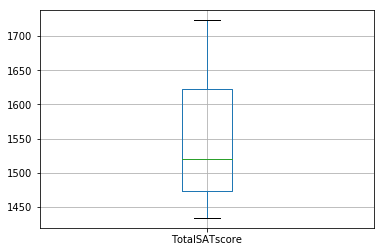

In [65]:
a.shape
plt.figure()
a.boxplot()

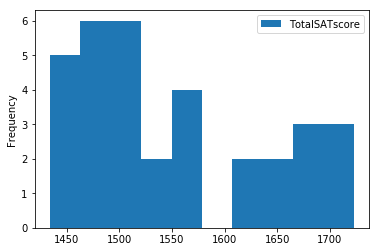

In [66]:
a.plot(kind="hist") 

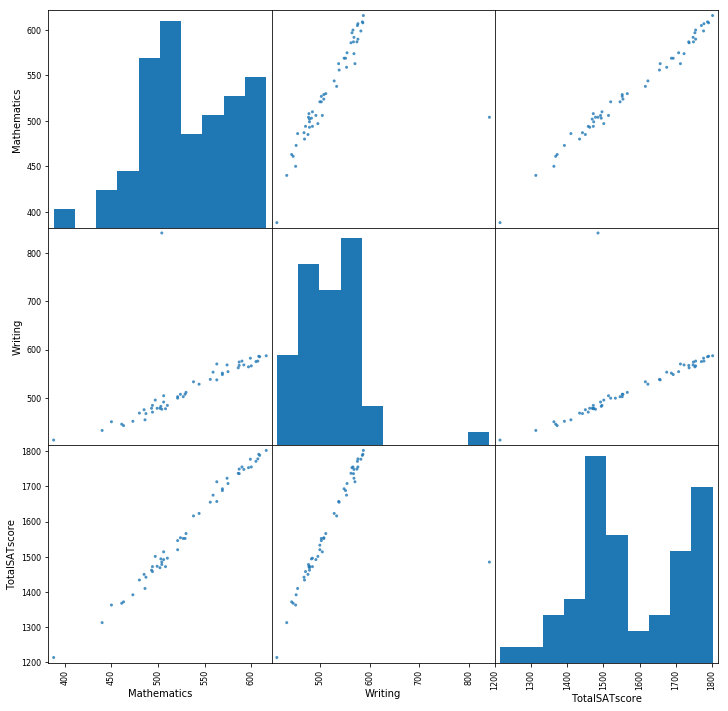

In [68]:
from pandas.plotting import scatter_matrix
#Graficos de correlacion
correl = scatter_matrix(scores[['Mathematics','Writing','TotalSATscore']],alpha=0.8, figsize=(12, 12), diagonal='hist')

In [70]:
satpbi=scores.join(pbi.set_index(['State']))
print(satpbi)

                      Mathematics  Writing  TotalSATscore       2011  \
State                                                                  
Alabama                     538.0      533           1616   180665.0   
Alaska                      503.0      482           1494    58759.0   
Arizona                     527.0      502           1552   254192.0   
Arkansas                    569.0      551           1688   107287.0   
California                  506.0      491           1492  2036297.0   
Colorado                    587.0      567           1736   262719.0   
Connecticut                 506.0      504           1514   234233.0   
Delaware                    461.0      445           1368    59937.0   
District of Columbia        440.0      432           1313   107738.0   
Florida                     480.0      468           1434   741455.0   
Georgia                     485.0      475           1450   424126.0   
Hawaii                      508.0      477           1472    700

In [71]:
#para eliminar los NAN
tabpbi=satpbi.dropna(how='any')
print(tabpbi)

                      Mathematics  Writing  TotalSATscore       2011  \
State                                                                  
Alabama                     538.0      533           1616   180665.0   
Alaska                      503.0      482           1494    58759.0   
Arizona                     527.0      502           1552   254192.0   
Arkansas                    569.0      551           1688   107287.0   
California                  506.0      491           1492  2036297.0   
Colorado                    587.0      567           1736   262719.0   
Connecticut                 506.0      504           1514   234233.0   
Delaware                    461.0      445           1368    59937.0   
District of Columbia        440.0      432           1313   107738.0   
Florida                     480.0      468           1434   741455.0   
Georgia                     485.0      475           1450   424126.0   
Hawaii                      508.0      477           1472    700

In [73]:
tabpbi.shape 
#no se considera West Virginia 
tabpbi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 9 columns):
Mathematics      50 non-null float64
Writing          50 non-null int64
TotalSATscore    50 non-null int64
2011             50 non-null float64
2012             50 non-null float64
2013             50 non-null float64
2014             50 non-null float64
2015             50 non-null float64
2016             50 non-null float64
dtypes: float64(7), int64(2)
memory usage: 3.9+ KB


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb9b9722898>,
      dtype=object)

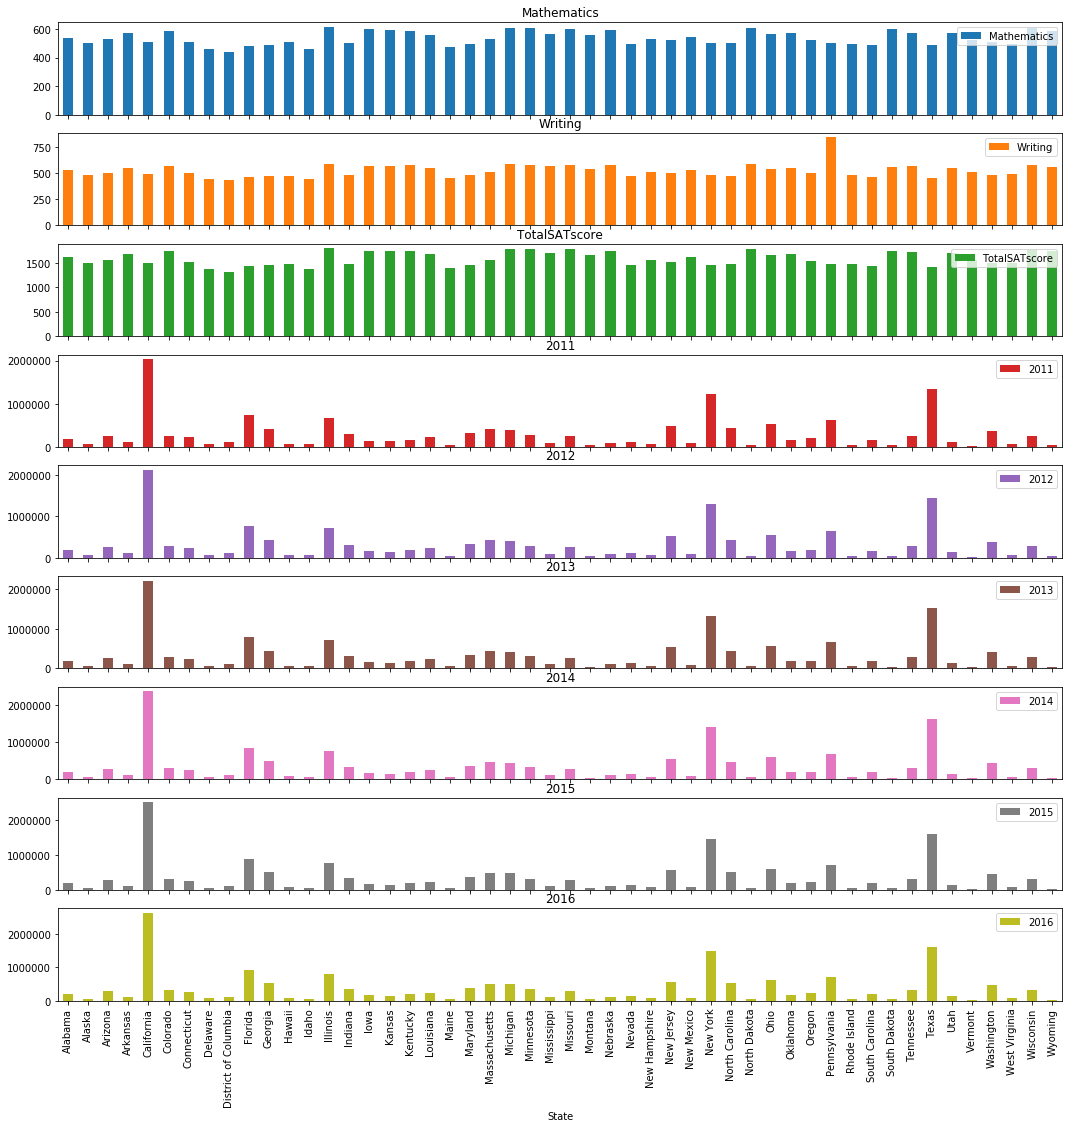

In [74]:
tabpbi.plot.bar(subplots=True,figsize =(18,18))

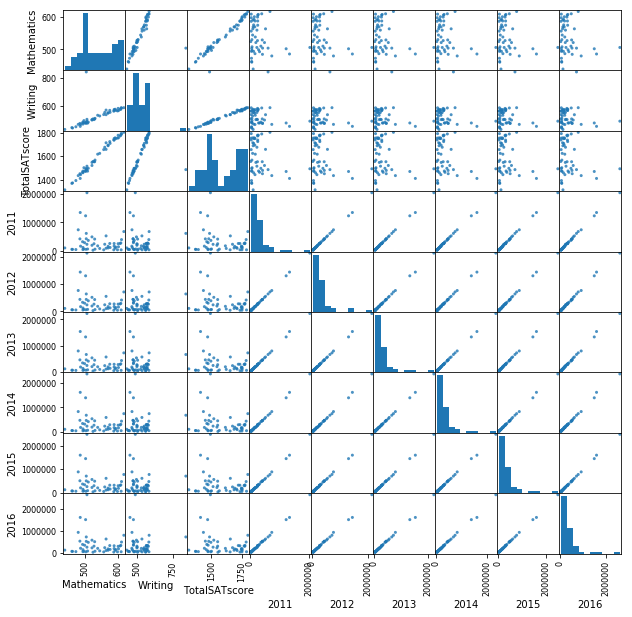

In [77]:
from pandas.plotting import scatter_matrix
#graficos de correlacion
plt.figure(figsize=(20,20))
grafcor_pbi = scatter_matrix(tabpbi[['Mathematics','Writing','TotalSATscore','2011','2012','2013','2014','2015','2016']],alpha=0.8, figsize=(10, 10), diagonal='hist')

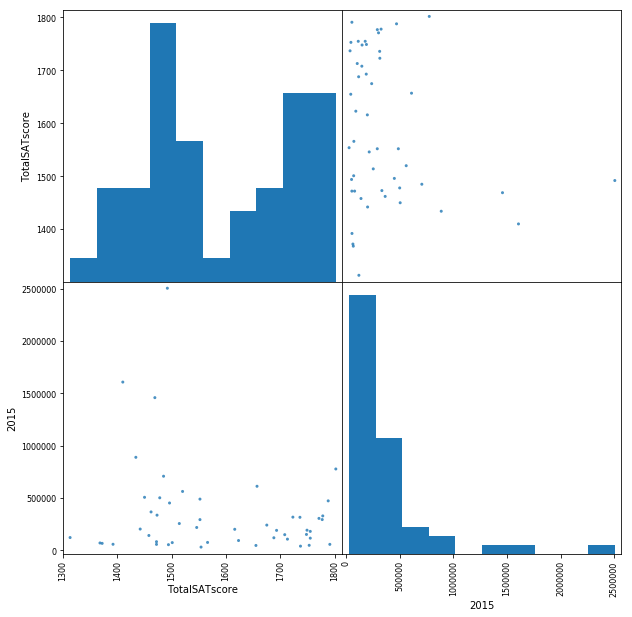

In [78]:
from pandas.plotting import scatter_matrix
#graficos de correlacion
plt.figure(figsize=(20,20))
grafcor_pbi2015 = scatter_matrix(tabpbi[['TotalSATscore','2015']],alpha=0.8, figsize=(10, 10), diagonal='hist')

In [109]:
#PBI 2011 ordenado de menor a mayor
tabpbi.iloc[:,:5].sort_values(['2011'], ascending = False)

,Mathematics,Writing,TotalSATscore,2011,2012
State,,,,,
California,506.0,491,1492,2036297.0,2131199.0
Texas,486.0,454,1410,1344733.0,1437893.0
New York,502.0,478,1469,1229743.0,1301041.0
Florida,480.0,468,1434,741455.0,764136.0
Illinois,616.0,587,1802,679776.0,711370.0
Pennsylvania,504.0,842,1485,615411.0,637896.0
Ohio,563.0,537,1657,528567.0,550299.0
New Jersey,521.0,499,1520,493343.0,514662.0
North Carolina,504.0,476,1478,427974.0,438350.0


In [94]:
pob_eeuu.head()

,Geographic Area,2010,2011,2012,2013,2014,2015,2016
0,Alabama,4785492,4799918,4815960,4829479,4843214,4853875,4863300
1,Alaska,714031,722713,731089,736879,736705,737709,741894
2,Arizona,6408312,6467163,6549634,6624617,6719993,6817565,6931071
3,Arkansas,2921995,2939493,2950685,2958663,2966912,2977853,2988248
4,California,37332685,37676861,38011074,38335203,38680810,38993940,39250017


In [95]:
new_pob =pob_eeuu.rename(columns={'Geographic Area':'State'})

In [86]:
new_pob.head(9)

,State,2010,2011,2012,2013,2014,2015,2016
0,.Alabama,4.785.492,4.799.918,4.815.960,4.829.479,4.843.214,4.853.875,4.863.300
1,.Alaska,714.031,722.713,731.089,736.879,736.705,737.709,741.894
2,.Arizona,6.408.312,6.467.163,6.549.634,6.624.617,6.719.993,6.817.565,6.931.071
3,.Arkansas,2.921.995,2.939.493,2.950.685,2.958.663,2.966.912,2.977.853,2.988.248
4,.California,37.332.685,37.676.861,38.011.074,38.335.203,38.680.810,38.993.940,39.250.017
5,.Colorado,5.048.644,5.118.360,5.189.867,5.267.603,5.349.648,5.448.819,5.540.545
6,.Connecticut,3.579.899,3.589.893,3.593.795,3.596.003,3.591.873,3.584.730,3.576.452
7,.Delaware,899.816,907.924,916.993,925.395,934.948,944.076,952.065
8,.District of Columbia,605.183,620.477,635.327,649.165,659.005,670.377,681.170


In [96]:
#Realizo un join para unir la data SAT y la data PBI por estados
#La data new_pob no tiene al estado Virgin Islands
satpob=scores.join(new_pob.set_index(['State']))
print(satpob)

                      Mathematics  Writing  TotalSATscore        2010  \
State                                                                   
Alabama                     538.0      533           1616   4785492.0   
Alaska                      503.0      482           1494    714031.0   
Arizona                     527.0      502           1552   6408312.0   
Arkansas                    569.0      551           1688   2921995.0   
California                  506.0      491           1492  37332685.0   
Colorado                    587.0      567           1736   5048644.0   
Connecticut                 506.0      504           1514   3579899.0   
Delaware                    461.0      445           1368    899816.0   
District of Columbia        440.0      432           1313    605183.0   
Florida                     480.0      468           1434  18849098.0   
Georgia                     485.0      475           1450   9713521.0   
Hawaii                      508.0      477         

In [97]:
#para eliminar los NAN
tab_pob=satpob.dropna(how='any')
print(tab_pob)

                      Mathematics  Writing  TotalSATscore        2010  \
State                                                                   
Alabama                     538.0      533           1616   4785492.0   
Alaska                      503.0      482           1494    714031.0   
Arizona                     527.0      502           1552   6408312.0   
Arkansas                    569.0      551           1688   2921995.0   
California                  506.0      491           1492  37332685.0   
Colorado                    587.0      567           1736   5048644.0   
Connecticut                 506.0      504           1514   3579899.0   
Delaware                    461.0      445           1368    899816.0   
District of Columbia        440.0      432           1313    605183.0   
Florida                     480.0      468           1434  18849098.0   
Georgia                     485.0      475           1450   9713521.0   
Hawaii                      508.0      477         

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb9b86c2e48>,
      dtype=object)

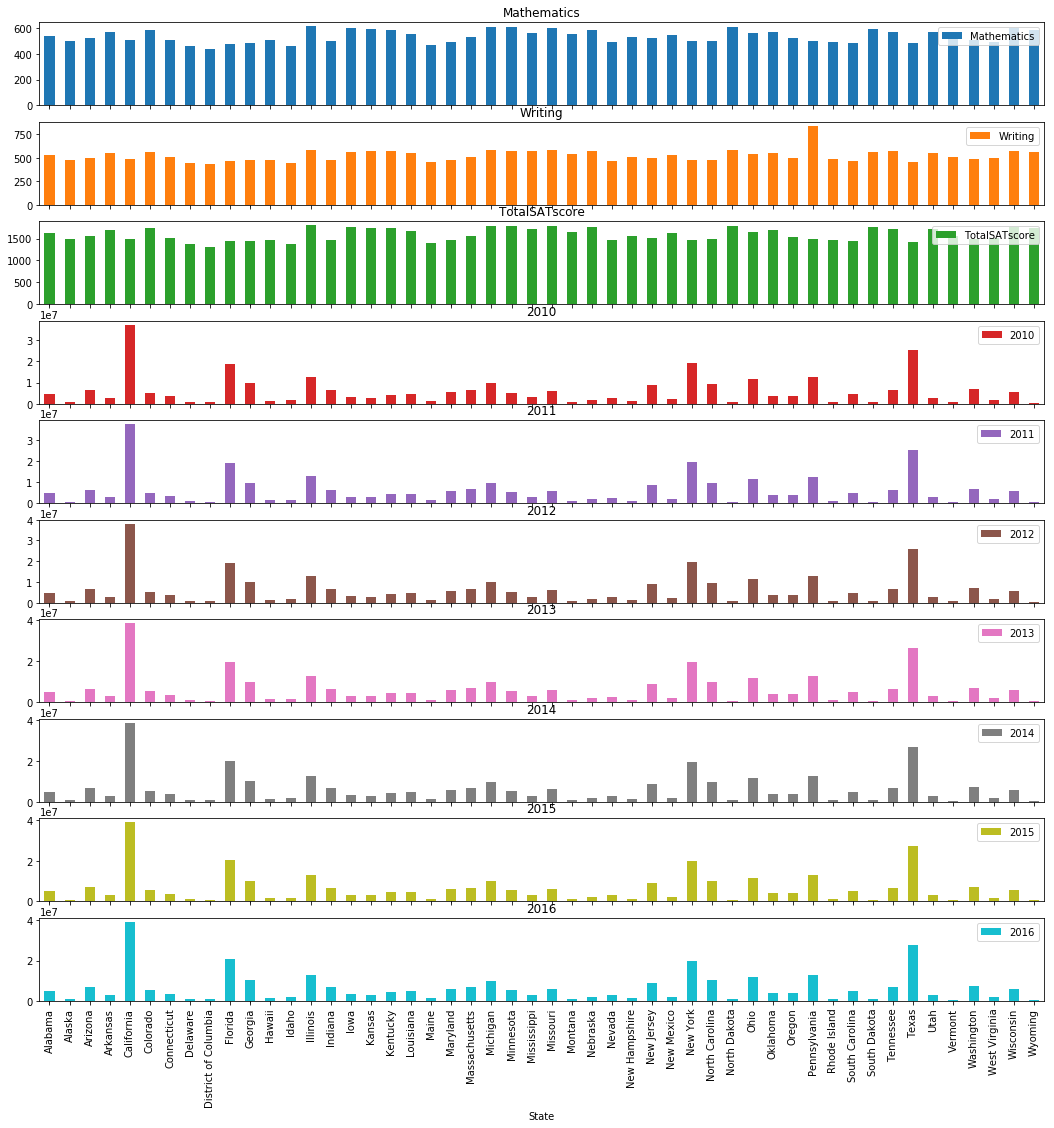

In [116]:
tab_pob.plot.bar(subplots=True,figsize =(18,18))

In [98]:
tab_pob.shape 
#no se considera West Virginia 
tab_pob.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 10 columns):
Mathematics      50 non-null float64
Writing          50 non-null int64
TotalSATscore    50 non-null int64
2010             50 non-null float64
2011             50 non-null float64
2012             50 non-null float64
2013             50 non-null float64
2014             50 non-null float64
2015             50 non-null float64
2016             50 non-null float64
dtypes: float64(8), int64(2)
memory usage: 4.3+ KB


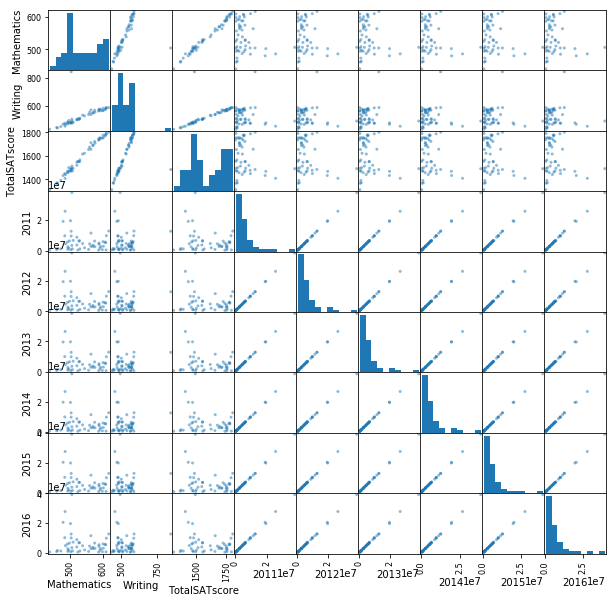

In [100]:
#graficos de correlacion
plt.figure(figsize=(20,20))
grafcor_pob = scatter_matrix(tab_pob[['Mathematics','Writing','TotalSATscore','2011','2012','2013','2014','2015','2016']],alpha=0.5, figsize=(10, 10), diagonal='hist')

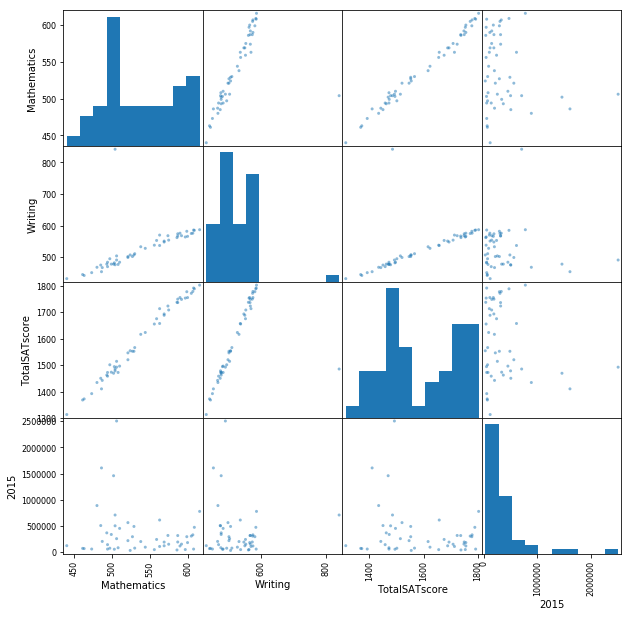

In [101]:
#graficos de correlacion
plt.figure(figsize=(15,15))
grafcor_pob2015 = scatter_matrix(tabpbi[['Mathematics','Writing','TotalSATscore','2015']],alpha=0.5, figsize=(10, 10), diagonal='hist')

In [103]:
a_pob=a.join(new_pob.set_index(['State']))
print(a_pob)
a_pob.shape

                TotalSATscore      2010      2011      2012      2013  \
State                                                                   
Alabama                  1616   4785492   4799918   4815960   4829479   
Alaska                   1494    714031    722713    731089    736879   
Arizona                  1552   6408312   6467163   6549634   6624617   
Arkansas                 1688   2921995   2939493   2950685   2958663   
California               1492  37332685  37676861  38011074  38335203   
Connecticut              1514   3579899   3589893   3593795   3596003   
Florida                  1434  18849098  19096952  19344156  19582022   
Georgia                  1450   9713521   9811610   9914668   9984938   
Hawaii                   1472   1363945   1377864   1391820   1406481   
Indiana                  1473   6490528   6516480   6537743   6569102   
Louisiana                1675   4544996   4575404   4603429   4626402   
Maryland                 1462   5788584   5843603  

(33, 8)

In [104]:
#para eliminar los NAN
tab_a=a_pob.dropna(how='any')
print(tab_a)

                TotalSATscore      2010      2011      2012      2013  \
State                                                                   
Alabama                  1616   4785492   4799918   4815960   4829479   
Alaska                   1494    714031    722713    731089    736879   
Arizona                  1552   6408312   6467163   6549634   6624617   
Arkansas                 1688   2921995   2939493   2950685   2958663   
California               1492  37332685  37676861  38011074  38335203   
Connecticut              1514   3579899   3589893   3593795   3596003   
Florida                  1434  18849098  19096952  19344156  19582022   
Georgia                  1450   9713521   9811610   9914668   9984938   
Hawaii                   1472   1363945   1377864   1391820   1406481   
Indiana                  1473   6490528   6516480   6537743   6569102   
Louisiana                1675   4544996   4575404   4603429   4626402   
Maryland                 1462   5788584   5843603  

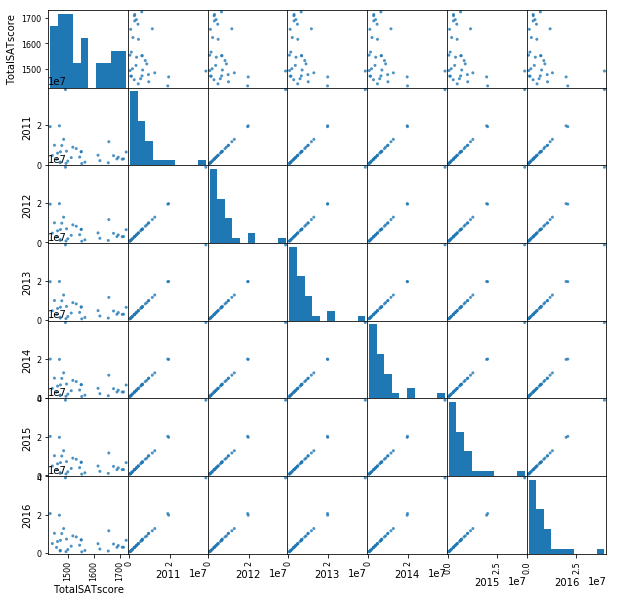

In [105]:
#graficos de correlacion
plt.figure(figsize=(20,20))
grafcor_apob = scatter_matrix(tab_a[['TotalSATscore','2011','2012','2013','2014','2015','2016']],alpha=0.8, figsize=(10, 10), diagonal='hist')

In [106]:
tab_a.corr()

,TotalSATscore,2010,2011,2012,2013,2014,2015,2016
TotalSATscore,1.000000,-0.288767,-0.289486,-0.290162,-0.290637,-0.291469,-0.292547,-0.293759
2010,-0.288767,1.000000,0.999991,0.999963,0.999918,0.999830,0.999682,0.999463
2011,-0.289486,0.999991,1.000000,0.999990,0.999961,0.999895,0.999772,0.999581
2012,-0.290162,0.999963,0.999990,1.000000,0.999990,0.999949,0.999856,0.999696
2013,-0.290637,0.999918,0.999961,0.999990,1.000000,0.999983,0.999918,0.999790
2014,-0.291469,0.999830,0.999895,0.999949,0.999983,1.000000,0.999975,0.999890
2015,-0.292547,0.999682,0.999772,0.999856,0.999918,0.999975,1.000000,0.999969
2016,-0.293759,0.999463,0.999581,0.999696,0.999790,0.999890,0.999969,1.000000


In [114]:
new_pob1 =new_pob.rename(columns={'2011':'2011p','2012':'2012p','2013':'2013p','2014':'2014p','2015':'2015p','2016':'2016p'})